In [33]:
!wget https://dysk.agh.edu.pl/s/G6ZNziBRbEEcMeN/download/Bike-Sharing-Dataset.zip -O Bike-Sharing-Dataset.zip
!unzip Bike-Sharing-Dataset.zip
!cat Readme.txt

--2025-04-19 10:01:07--  https://dysk.agh.edu.pl/s/G6ZNziBRbEEcMeN/download/Bike-Sharing-Dataset.zip
Resolving dysk.agh.edu.pl (dysk.agh.edu.pl)... 149.156.96.4, 2001:6d8:10:1060::6004
Connecting to dysk.agh.edu.pl (dysk.agh.edu.pl)|149.156.96.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/zip]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K   951KB/s    in 0.3s    

2025-04-19 10:01:08 (951 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                
Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where 

In [34]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.builder.appName("BikerRental").master("local[*]").getOrCreate()
df = spark.read.csv('day.csv', header=True, inferSchema=True)
df.show(5)
df.printSchema()

+-------+----------+------+---+----+-------+-------+----------+----------+--------+--------+--------+---------+------+----------+----+
|instant|    dteday|season| yr|mnth|holiday|weekday|workingday|weathersit|    temp|   atemp|     hum|windspeed|casual|registered| cnt|
+-------+----------+------+---+----+-------+-------+----------+----------+--------+--------+--------+---------+------+----------+----+
|      1|2011-01-01|     1|  0|   1|      0|      6|         0|         2|0.344167|0.363625|0.805833| 0.160446|   331|       654| 985|
|      2|2011-01-02|     1|  0|   1|      0|      0|         0|         2|0.363478|0.353739|0.696087| 0.248539|   131|       670| 801|
|      3|2011-01-03|     1|  0|   1|      0|      1|         1|         1|0.196364|0.189405|0.437273| 0.248309|   120|      1229|1349|
|      4|2011-01-04|     1|  0|   1|      0|      2|         1|         1|     0.2|0.212122|0.590435| 0.160296|   108|      1454|1562|
|      5|2011-01-05|     1|  0|   1|      0|      3|   

In [41]:
if str(df.schema['dteday'].dataType) != 'DateType':
    df = df.withColumn("dteday", to_date(col("dteday"), "yyyy-MM-dd"))
    print("\\nSchema after date conversion:")
    df.printSchema()


\nSchema after date conversion:
root
 |-- instant: integer (nullable = true)
 |-- dteday: date (nullable = true)
 |-- season: integer (nullable = true)
 |-- yr: integer (nullable = true)
 |-- mnth: integer (nullable = true)
 |-- holiday: integer (nullable = true)
 |-- weekday: integer (nullable = true)
 |-- workingday: integer (nullable = true)
 |-- weathersit: integer (nullable = true)
 |-- temp: double (nullable = true)
 |-- atemp: double (nullable = true)
 |-- hum: double (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- casual: integer (nullable = true)
 |-- registered: integer (nullable = true)
 |-- cnt: integer (nullable = true)



In [42]:
pdf = df.toPandas()

/usr/lib/python3.10/socket.py:776: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 41678), raddr=('127.0.0.1', 33477)>
  self._sock = None


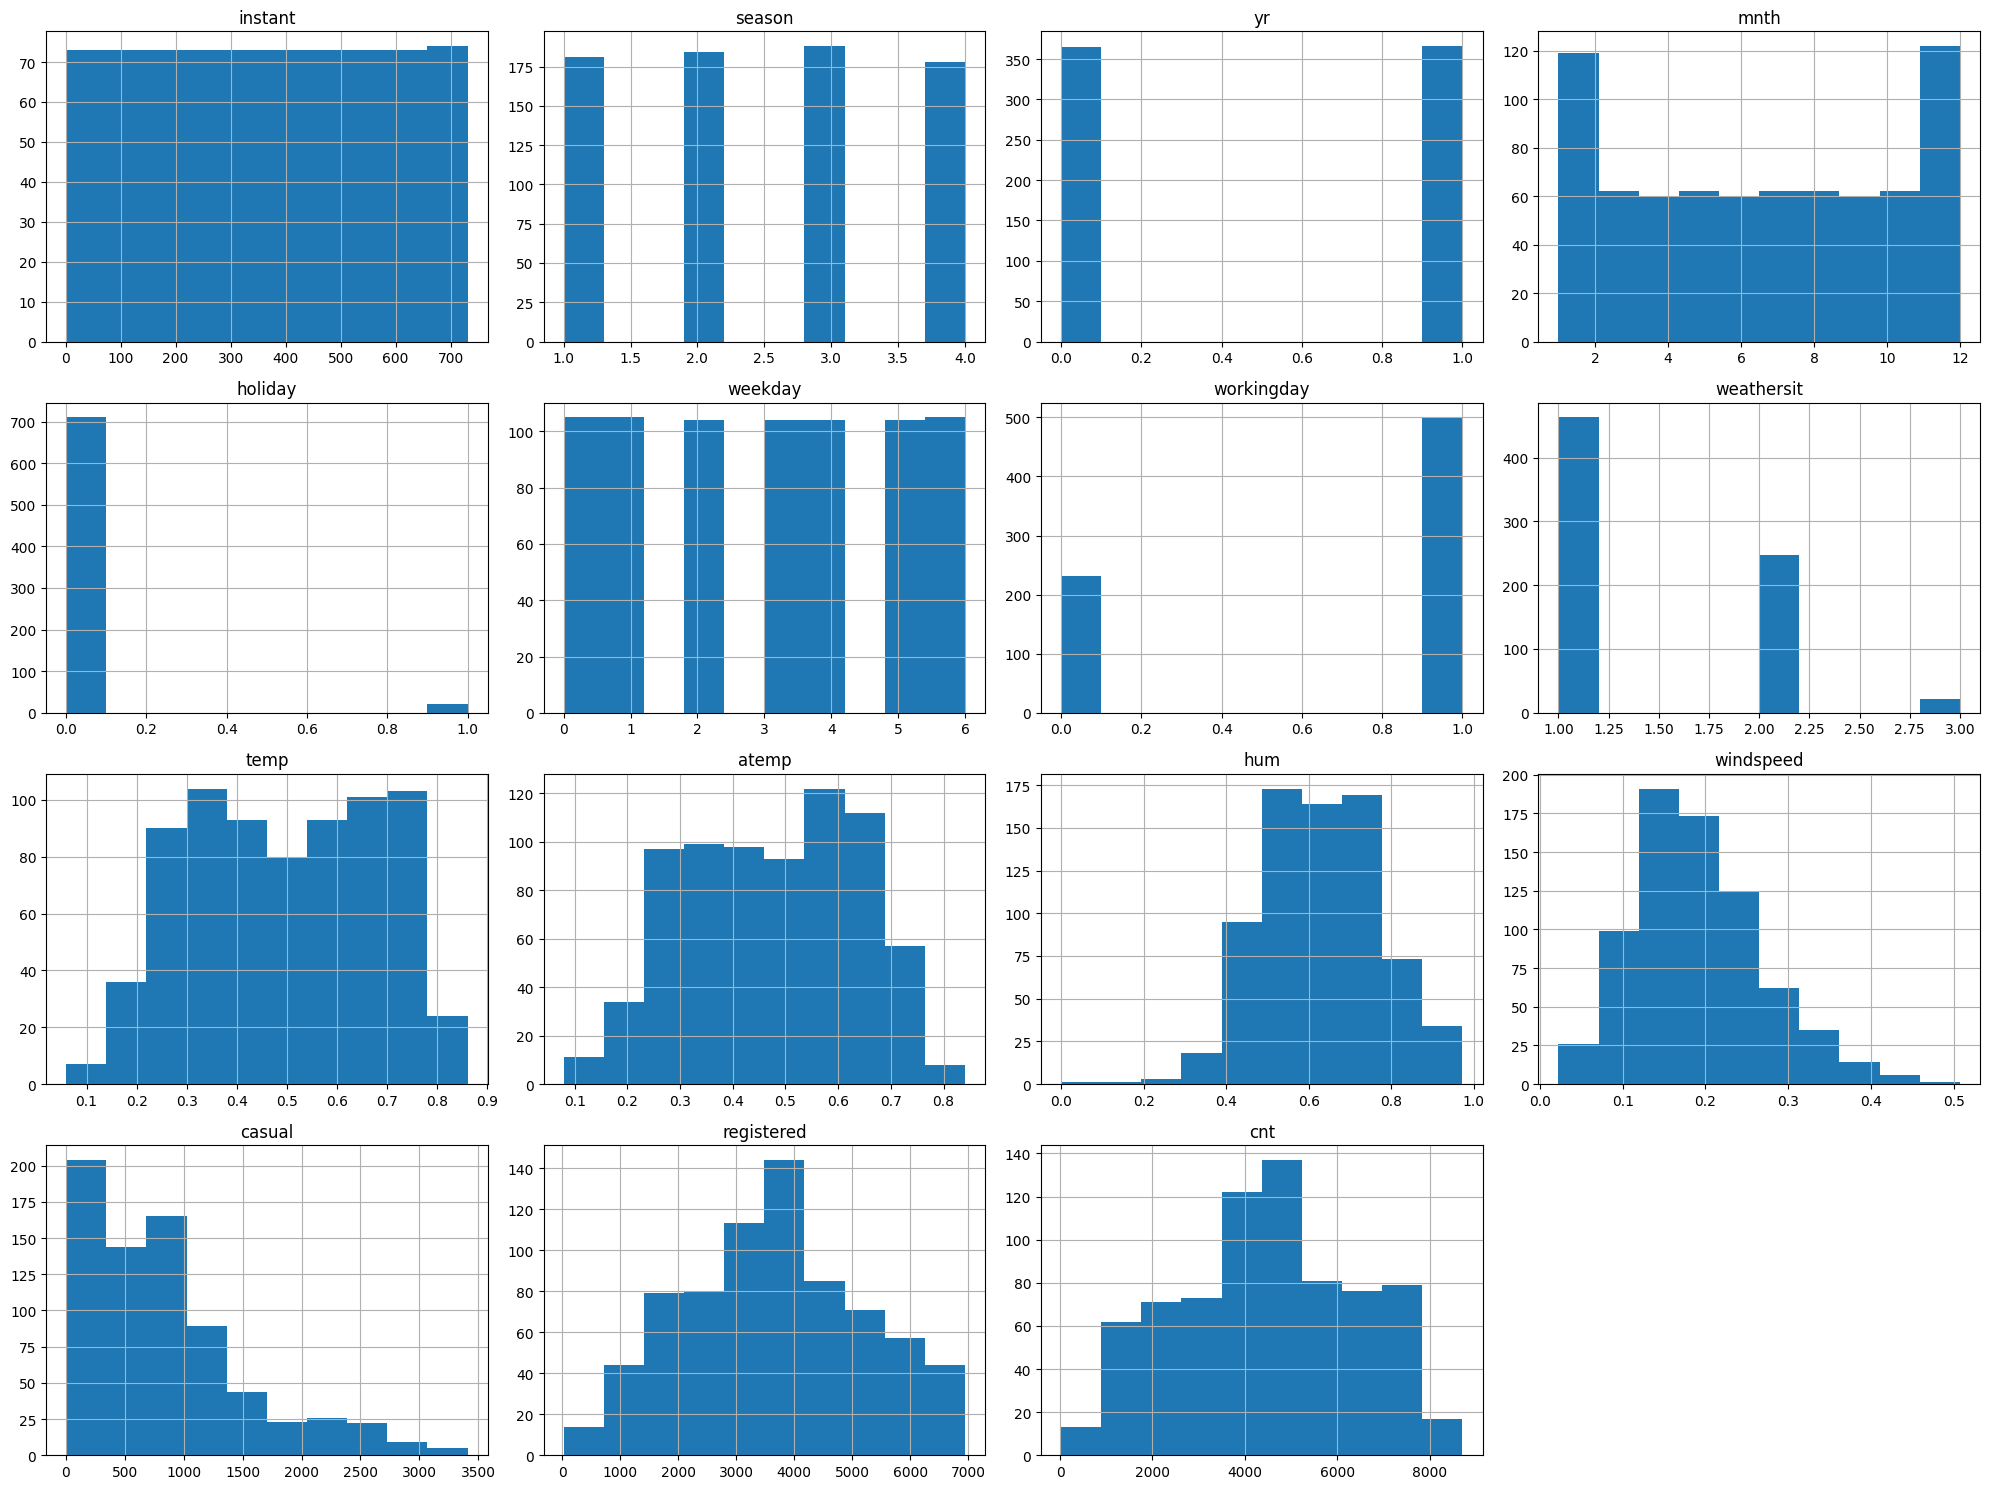

In [44]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 15) # Zwiększony rozmiar dla lepszej widoczności
pdf.hist()
plt.tight_layout() # Dostosowanie układu
plt.show()


\nPlotting counts over time:


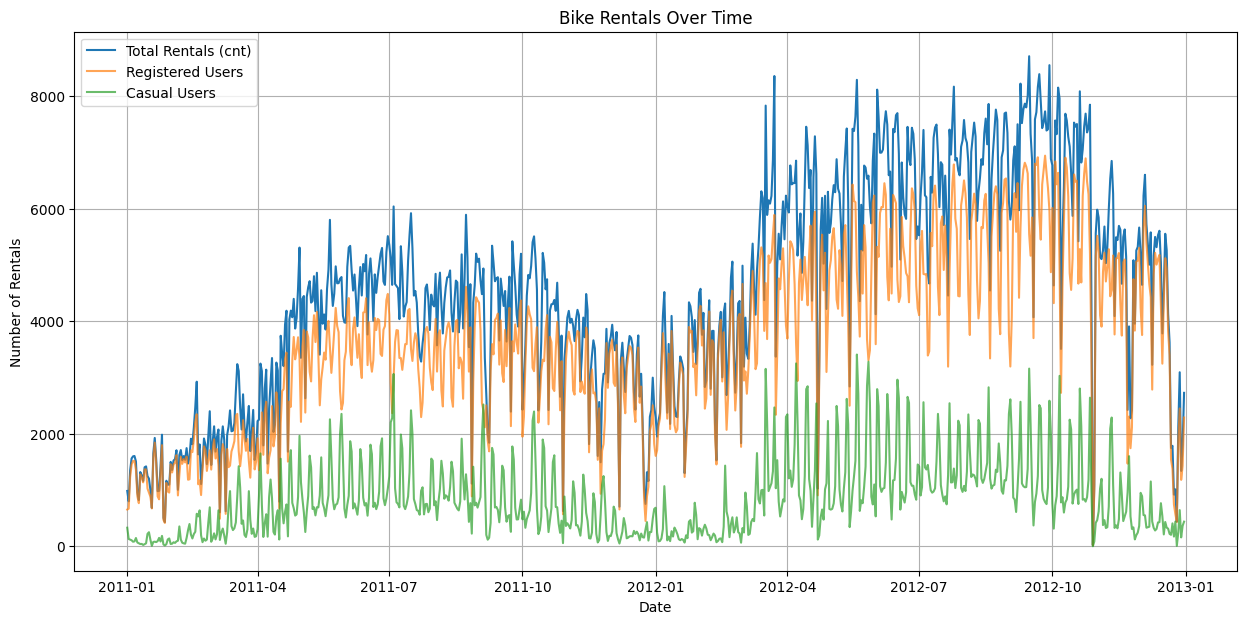

In [45]:

# Komórka 7: Wykres zależności cnt, registered i casual od daty
print("\\nPlotting counts over time:")
plt.figure(figsize=(15, 7))
# Sortowanie wg daty jest ważne dla wykresu liniowego
pdf_sorted = pdf.sort_values(by='dteday')
plt.plot(pdf_sorted['dteday'], pdf_sorted['cnt'], label='Total Rentals (cnt)')
plt.plot(pdf_sorted['dteday'], pdf_sorted['registered'], label='Registered Users', alpha=0.7)
plt.plot(pdf_sorted['dteday'], pdf_sorted['casual'], label='Casual Users', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.title('Bike Rentals Over Time')
plt.legend()
plt.grid(True)
plt.show()